## Setup

In [18]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from keras.layers import Conv2D, MaxPool2D, Dense, BatchNormalization, \
                         Input, Flatten, Activation, Reshape
from keras.models import Model

# Ignorar warnings, especialmente do scikit-image
import warnings
warnings.filterwarnings("ignore")

## Download do dataset, e divisão em treino e teste

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test)  = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


## Criação do modelo

### Definição do input, das camadas e treinamento

In [9]:
inputs = Input(shape=(784, ))

X = Reshape((28, 28, 1))(inputs)


for j in range(2):
    X = Conv2D(4, 3, strides=(1, 1), padding='valid')(X)
    X = BatchNormalization()(X)
    X = Activation('relu')(X)
    
X = Dense(64, activation='relu')(Flatten()(X))
X = Dense(10, activation='softmax')(X)
    
model = Model(inputs, X)

model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

model.fit(
    x=np.reshape(x_train, (x_train.shape[0], 784)), 
    y=np.eye(np.max(y_train) + 1)[y_train], batch_size=100, epochs=2)

Epoch 1/2
60000/60000 [==============================] - 28s 467us/step - loss: 0.2100 - acc: 0.9347
Epoch 2/2
60000/60000 [==============================] - 37s 612us/step - loss: 0.0706 - acc: 0.9791


### Avaliação

In [10]:
model.evaluate(x=np.reshape(x_test, (x_test.shape[0], 784)), 
               y=np.eye(np.max(y_test) + 1)[y_test])

10000/10000 [==============================] - 2s 249us/step


[0.06650953354379162, 0.9775]

### Usando o modelo recém-criado com entrada direto do conjunto de treino

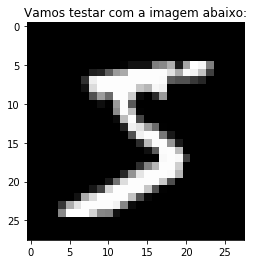

In [123]:
# Pegar o primeiro exemplo de treino
entrada = x_train[0,:]

plt.figure()
plt.imshow(entrada, cmap='gray')
plt.title("Vamos testar com a imagem abaixo:")
pass

In [124]:
# Tornar a entrada flat
entrada = np.reshape(entrada, (1, 784))

resultado = model.predict(x=entrada)
resultado = np.argmax(resultado)
print("Resposta do modelo: %d" % resultado)

Resposta do modelo: 5


### Usando o modelo recém-criado com entrada de uma foto existente num diretório

##### Carregar imagem crua

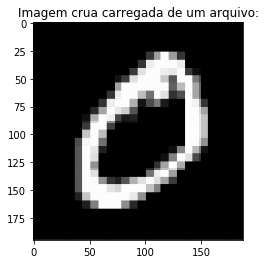

In [116]:
from PIL import Image

arquivo_imagem = "fotos_teste/0.png"
img = Image.open(arquivo_imagem)

plt.figure()
plt.imshow(img, cmap='gray')
plt.title("Imagem crua carregada de um arquivo:")
pass

##### Redimensionar para 28x28

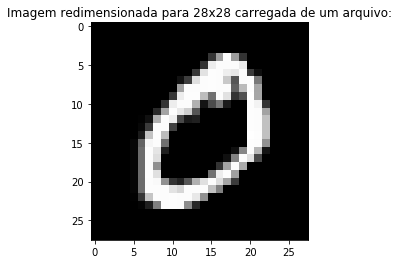

In [121]:
from skimage.transform import resize

nova_img = (img / np.max(img)  )[:, :, 0] * 255
# nova_img = np.array(img)
nova_img = resize(nova_img, (28, 28))

plt.figure()
plt.imshow(nova_img, cmap='gray')
plt.title("Imagem redimensionada para 28x28 carregada de um arquivo:")
pass

##### Aplainar para dimensão unidimensional de tamanho 784, jogar no modelo e mostrar saída

In [122]:
# Tornar a entrada flat
entrada = np.reshape(nova_img, (1, 784))

resultado = model.predict(x=entrada)
resultado = np.argmax(resultado)
print("Resposta do modelo: %d" % resultado)

Resposta do modelo: 0


### Exportando modelo para arquivo em disco (formatos *.json e *.h5)

In [84]:
model_json = model.to_json()
jsonfile = "model/model.json"
h5file = "model/model.h5"
with open(jsonfile, "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights(h5file)
print("Modelo salvo nos arquivos %s e %s" % (jsonfile, h5file))

Modelo salvo nos arquivos model/model.json e model/model.h5


### Carregando modelo salvo e usando para fazer inferências

##### Carregamos os dois arquivos: o *.json nos dá a arquitetura do modelo, o *.h5 nos dá os pesos obtidos durante treinamento

In [85]:
from keras.models import model_from_json
json_file = open(jsonfile, 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights(h5file)
print("Modelo carregado dos arquivos %s e %s" % (jsonfile, h5file))

##### Podemos usar o modelo carregado para fazer inferências, como se tivéssemos treinado:

In [93]:
# Pegando a mesma entrada usada anteriormente

resultado = loaded_model.predict(x=entrada)
resultado = np.argmax(resultado)
print("Resposta do modelo carregado: %d" % resultado)

Resposta do modelo carregado: 5
